In [48]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [49]:
import numpy as np
import os, h5py
import matplotlib.pyplot as plt
from sklearn import decomposition

%matplotlib inline

In [50]:
dst_path = "/home/sobolev/nevermind/AG_Pecka/data/processed/"
session  = "009266_hippoSIT_2023-05-04_09-11-06"
animal   = session.split('_')[0]
meta_file  = os.path.join(dst_path, animal, session, 'meta.h5')
units_file = os.path.join(dst_path, animal, session, 'units.h5')
aeps_file = os.path.join(dst_path, animal, session, 'AEPs.h5')
aeps_c_file = os.path.join(dst_path, animal, session, 'analysis', 'AEP_components.h5')

In [51]:
area = 'A1'

with h5py.File(meta_file, 'r') as f:
    sound_events = np.array(f['processed']['sound_events'])
    tgt_mx       = np.array(f['processed']['target_matrix'])
    tl           = np.array(f['processed']['timeline'])
    
with h5py.File(aeps_file, 'r') as f:
    name = [x for x in f[area]][0]
    aeps = np.array(f[area][name])
    
aeps_metrics = {}
with h5py.File(aeps_c_file, 'r') as f:
    for ds_name in f[area]:
        aeps_metrics[ds_name] = np.array(f[area][ds_name])
    
aeps[aeps > 5000] = 5000
aeps[aeps < -5000] = -5000
aeps.shape

(9599, 250)

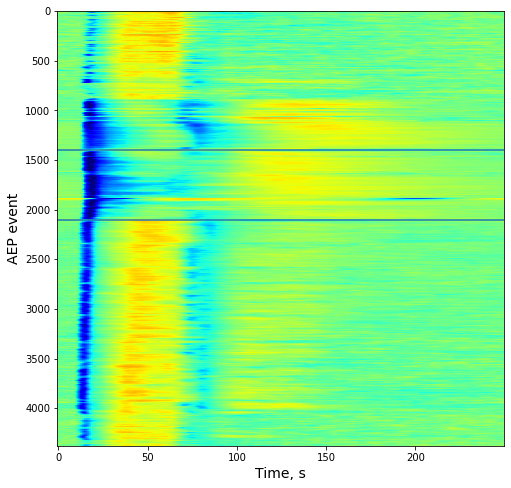

In [52]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(aeps[sound_events[:, 1] == 1][:], aspect='auto', cmap='jet')
ax.set_xlabel('Time, s', fontsize=14)
ax.set_ylabel('AEP event', fontsize=14)
ax.axhline(1400)
ax.axhline(2100)
#for key, value in AEP_metrics_lims[area].items():
#    ax.axvline(value[0], color='gray', ls='--')
#    ax.axvline(value[1], color='gray', ls='--')

In [32]:
# COMA in BGR indices:
# 690 - 725
# 890 - 4000
# 1400 - 2100 - deep COMA?

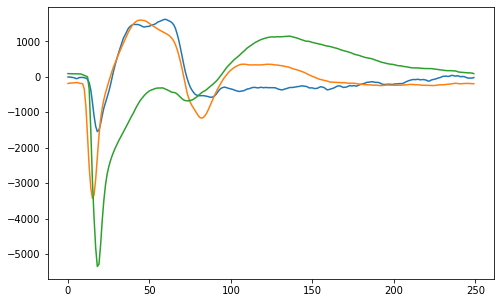

In [33]:
# AEP shape
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(aeps[sound_events[:, 1] == 1][:690].mean(axis=0))  # normal
ax.plot(aeps[sound_events[:, 1] == 1][2100:4000].mean(axis=0))  # COMA average
ax.plot(aeps[sound_events[:, 1] == 1][1400:2100].mean(axis=0))  # COMA deep

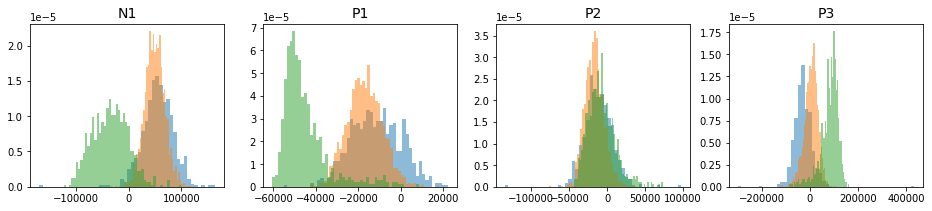

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
bins = np.linspace(-10000, 5000, 50)
m_type = 'raw'
bgr_idxs = np.where(sound_events[:, 1] == 1)[0]
metric_names = [x[:2] for x in aeps_metrics.keys() if x.find(m_type) > 0]

for i, metric in enumerate(metric_names):
    ax = axes[i]
    ax.hist(aeps_metrics['%s_%s' % (metric, m_type)][bgr_idxs][:690], bins=50, alpha=0.5, density=True)
    ax.hist(aeps_metrics['%s_%s' % (metric, m_type)][bgr_idxs][2100:4000], bins=50, alpha=0.5, density=True)
    ax.hist(aeps_metrics['%s_%s' % (metric, m_type)][bgr_idxs][1400:2100], bins=50, alpha=0.5, density=True)
    ax.set_title(metric, fontsize=14)